In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
df = pd.read_csv('shopping_trends.csv')
df.head()

,Customer ID,Age,Gender,Item Purchased,Category,Purchase Amount (USD),Location,Size,Color,Season,Review Rating,Subscription Status,Payment Method,Shipping Type,Discount Applied,Promo Code Used,Previous Purchases,Preferred Payment Method,Frequency of Purchases
0,1,55,Male,Blouse,Clothing,53,Kentucky,L,Gray,Winter,3.1,Yes,Credit Card,Express,Yes,Yes,14,Venmo,Fortnightly
1,2,19,Male,Sweater,Clothing,64,Maine,L,Maroon,Winter,3.1,Yes,Bank Transfer,Express,Yes,Yes,2,Cash,Fortnightly
2,3,50,Male,Jeans,Clothing,73,Massachusetts,S,Maroon,Spring,3.1,Yes,Cash,Free Shipping,Yes,Yes,23,Credit Card,Weekly
3,4,21,Male,Sandals,Footwear,90,Rhode Island,M,Maroon,Spring,3.5,Yes,PayPal,Next Day Air,Yes,Yes,49,PayPal,Weekly
4,5,45,Male,Blouse,Clothing,49,Oregon,M,Turquoise,Spring,2.7,Yes,Cash,Free Shipping,Yes,Yes,31,PayPal,Annually


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3900 entries, 0 to 3899
Data columns (total 19 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Customer ID               3900 non-null   int64  
 1   Age                       3900 non-null   int64  
 2   Gender                    3900 non-null   object 
 3   Item Purchased            3900 non-null   object 
 4   Category                  3900 non-null   object 
 5   Purchase Amount (USD)     3900 non-null   int64  
 6   Location                  3900 non-null   object 
 7   Size                      3900 non-null   object 
 8   Color                     3900 non-null   object 
 9   Season                    3900 non-null   object 
 10  Review Rating             3900 non-null   float64
 11  Subscription Status       3900 non-null   object 
 12  Payment Method            3900 non-null   object 
 13  Shipping Type             3900 non-null   object 
 14  Discount

In [5]:
df.shape

(3900, 19)

In [6]:
df.isna().sum()

Customer ID                 0
Age                         0
Gender                      0
Item Purchased              0
Category                    0
Purchase Amount (USD)       0
Location                    0
Size                        0
Color                       0
Season                      0
Review Rating               0
Subscription Status         0
Payment Method              0
Shipping Type               0
Discount Applied            0
Promo Code Used             0
Previous Purchases          0
Preferred Payment Method    0
Frequency of Purchases      0
dtype: int64

In [7]:
# Checking for duplicates
df.duplicated().sum()

0

In [8]:
df.describe()

,Customer ID,Age,Purchase Amount (USD),Review Rating,Previous Purchases
count,3900.000000,3900.000000,3900.000000,3900.000000,3900.000000
mean,1950.500000,44.068462,59.764359,3.749949,25.351538
std,1125.977353,15.207589,23.685392,0.716223,14.447125
min,1.000000,18.000000,20.000000,2.500000,1.000000
25%,975.750000,31.000000,39.000000,3.100000,13.000000
50%,1950.500000,44.000000,60.000000,3.700000,25.000000
75%,2925.250000,57.000000,81.000000,4.400000,38.000000
max,3900.000000,70.000000,100.000000,5.000000,50.000000


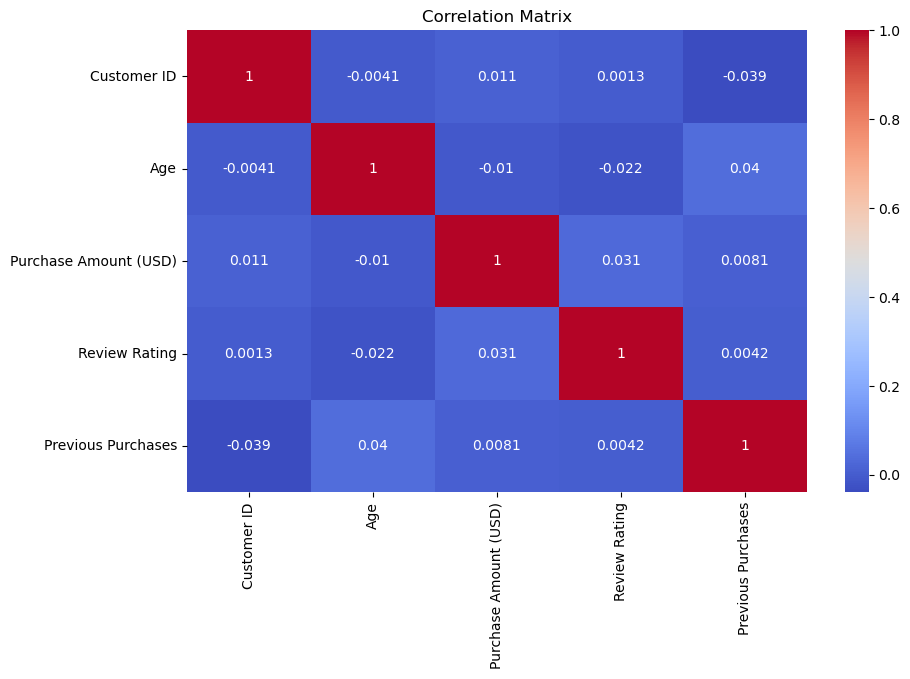

In [10]:
# drow a corroliation matrix
numircals = df.select_dtypes(include=['number'])
plt.figure(figsize=(10, 6))
sns.heatmap(numircals.corr(), annot=True, cmap='coolwarm')
plt.title("Correlation Matrix")
plt.show()

## Data cleaning and preprocessing

In [15]:
df['Promo_Code_Used'] = df['Promo Code Used'].map({'Yes': True, 'No': False}).astype(bool)
df['Discount_Applied'] = df['Discount Applied'].map({'Yes': True, 'No': False}).astype(bool)
df['Subscription_Status'] = df['Subscription Status'].map({'Yes': True, 'No': False}).astype(bool)

In [17]:
df['Size'] = df['Size'].astype('category')
df['Color'] = df['Color'].astype('category')
df['Season'] = df['Season'].astype('category')
df['Item Purchased'] = df['Item Purchased'].astype('category')
df['Category'] = df['Category'].astype('category')
df['Gender'] = df['Gender'].astype('category')

In [19]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3900 entries, 0 to 3899
Data columns (total 22 columns):
 #   Column                    Non-Null Count  Dtype   
---  ------                    --------------  -----   
 0   Customer ID               3900 non-null   int64   
 1   Age                       3900 non-null   int64   
 2   Gender                    3900 non-null   category
 3   Item Purchased            3900 non-null   category
 4   Category                  3900 non-null   category
 5   Purchase Amount (USD)     3900 non-null   int64   
 6   Location                  3900 non-null   object  
 7   Size                      3900 non-null   category
 8   Color                     3900 non-null   category
 9   Season                    3900 non-null   category
 10  Review Rating             3900 non-null   float64 
 11  Subscription Status       3900 non-null   object  
 12  Payment Method            3900 non-null   object  
 13  Shipping Type             3900 non-null   object

In [21]:
kinds_shopping = {
    'Clothing': 'Apparel',
    'Footwear': 'Apparel',
    'Accessories': 'Fashion',
    'Electronics': 'Technology',
    'Home Decor': 'Home & Living',
    'Furniture': 'Home & Living',
    'Beauty': 'Personal Care'
}

df['kinds_shopping'] = df['Category'].map(kinds_shopping).fillna('Other')


print(df[['Category', 'kinds_shopping']].head(20))

       Category kinds_shopping
0      Clothing        Apparel
1      Clothing        Apparel
2      Clothing        Apparel
3      Footwear        Apparel
4      Clothing        Apparel
5      Footwear        Apparel
6      Clothing        Apparel
7      Clothing        Apparel
8     Outerwear          Other
9   Accessories        Fashion
10     Footwear        Apparel
11     Clothing        Apparel
12    Outerwear          Other
13     Clothing        Apparel
14    Outerwear          Other
15     Clothing        Apparel
16  Accessories        Fashion
17     Clothing        Apparel
18     Clothing        Apparel
19     Clothing        Apparel


In [23]:
# Feature: Age Group
df['Kind_age'] = pd.cut(df['Age'], bins=[0, 30, 50, 100], labels=['Young', 'Middle-aged', 'older'])

# Feature: Spending Behavior
df['High Spender'] = (df['Purchase Amount (USD)'] > 75).astype(int)
df['Low Spender'] = (df['Purchase Amount (USD)'] < 25).astype(int)

# Feature: Loyalty Status
df['Loyalty Status'] = (df['Purchase Amount (USD)'] > 100).astype(int)

In [25]:
df.head()

,Customer ID,Age,Gender,Item Purchased,Category,Purchase Amount (USD),Location,Size,Color,Season,...,Preferred Payment Method,Frequency of Purchases,Promo_Code_Used,Discount_Applied,Subscription_Status,kinds_shopping,Kind_age,High Spender,Low Spender,Loyalty Status
0,1,55,Male,Blouse,Clothing,53,Kentucky,L,Gray,Winter,...,Venmo,Fortnightly,True,True,True,Apparel,older,0,0,0
1,2,19,Male,Sweater,Clothing,64,Maine,L,Maroon,Winter,...,Cash,Fortnightly,True,True,True,Apparel,Young,0,0,0
2,3,50,Male,Jeans,Clothing,73,Massachusetts,S,Maroon,Spring,...,Credit Card,Weekly,True,True,True,Apparel,Middle-aged,0,0,0
3,4,21,Male,Sandals,Footwear,90,Rhode Island,M,Maroon,Spring,...,PayPal,Weekly,True,True,True,Apparel,Young,1,0,0
4,5,45,Male,Blouse,Clothing,49,Oregon,M,Turquoise,Spring,...,PayPal,Annually,True,True,True,Apparel,Middle-aged,0,0,0


In [27]:
df.describe()

,Customer ID,Age,Purchase Amount (USD),Review Rating,Previous Purchases,High Spender,Low Spender,Loyalty Status
count,3900.000000,3900.000000,3900.000000,3900.000000,3900.000000,3900.000000,3900.000000,3900.0
mean,1950.500000,44.068462,59.764359,3.749949,25.351538,0.311282,0.063846,0.0
std,1125.977353,15.207589,23.685392,0.716223,14.447125,0.463077,0.244510,0.0
min,1.000000,18.000000,20.000000,2.500000,1.000000,0.000000,0.000000,0.0
25%,975.750000,31.000000,39.000000,3.100000,13.000000,0.000000,0.000000,0.0
50%,1950.500000,44.000000,60.000000,3.700000,25.000000,0.000000,0.000000,0.0
75%,2925.250000,57.000000,81.000000,4.400000,38.000000,1.000000,0.000000,0.0
max,3900.000000,70.000000,100.000000,5.000000,50.000000,1.000000,1.000000,0.0


In [29]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3900 entries, 0 to 3899
Data columns (total 27 columns):
 #   Column                    Non-Null Count  Dtype   
---  ------                    --------------  -----   
 0   Customer ID               3900 non-null   int64   
 1   Age                       3900 non-null   int64   
 2   Gender                    3900 non-null   category
 3   Item Purchased            3900 non-null   category
 4   Category                  3900 non-null   category
 5   Purchase Amount (USD)     3900 non-null   int64   
 6   Location                  3900 non-null   object  
 7   Size                      3900 non-null   category
 8   Color                     3900 non-null   category
 9   Season                    3900 non-null   category
 10  Review Rating             3900 non-null   float64 
 11  Subscription Status       3900 non-null   object  
 12  Payment Method            3900 non-null   object  
 13  Shipping Type             3900 non-null   object

## Statistical Analysis of the shopping_Trends

In [33]:
# Select numeric columns
numircals = df.select_dtypes(include=['number'])

# Calculate quartiles and IQR
Q1 = df[numircals.columns].quantile(0.25)
Madien_Q2 = df[numircals.columns].quantile(0.5)
Q3 = df[numircals.columns].quantile(0.75)
IQR = Q3 - Q1

# Print results
print(f'The first quartile (Q1) is:\n{Q1}\n')
print(f'The second quartile (Q2) is:\n{Madien_Q2}\n')
print(f'The third quartile (Q3) is:\n{Q3}\n')
print(f'The interquartile range (IQR) is:\n{IQR}\n')

The first quartile (Q1) is:
Customer ID              975.75
Age                       31.00
Purchase Amount (USD)     39.00
Review Rating              3.10
Previous Purchases        13.00
High Spender               0.00
Low Spender                0.00
Loyalty Status             0.00
Name: 0.25, dtype: float64

The second quartile (Q2) is:
Customer ID              1950.5
Age                        44.0
Purchase Amount (USD)      60.0
Review Rating               3.7
Previous Purchases         25.0
High Spender                0.0
Low Spender                 0.0
Loyalty Status              0.0
Name: 0.5, dtype: float64

The third quartile (Q3) is:
Customer ID              2925.25
Age                        57.00
Purchase Amount (USD)      81.00
Review Rating               4.40
Previous Purchases         38.00
High Spender                1.00
Low Spender                 0.00
Loyalty Status              0.00
Name: 0.75, dtype: float64

The interquartile range (IQR) is:
Customer ID           

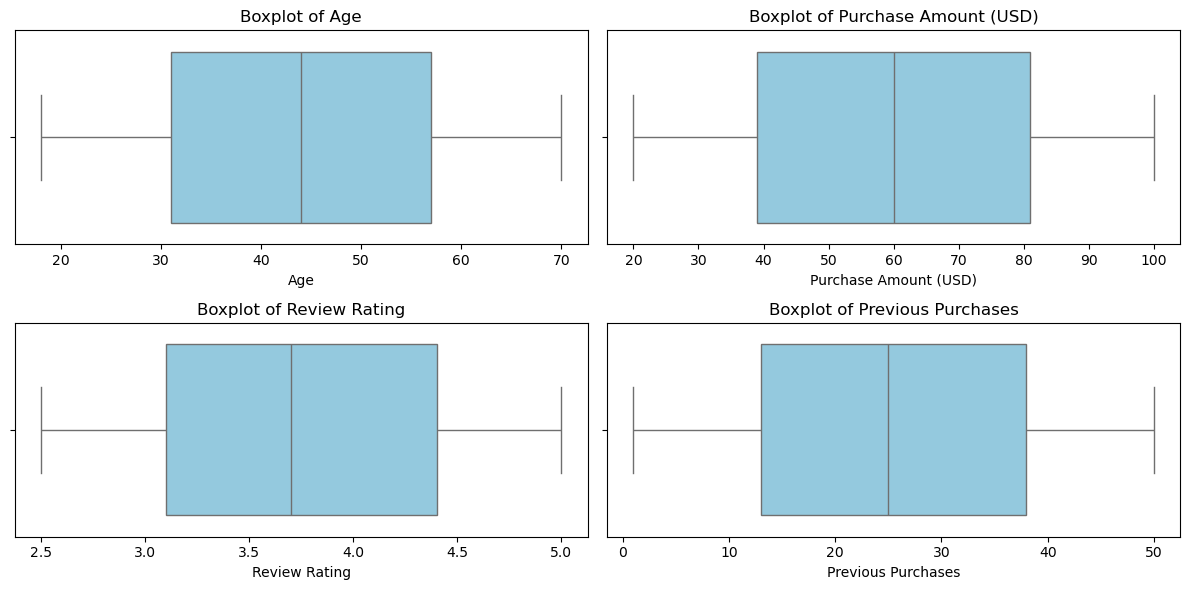

In [37]:
# Select numerical columns
numerical_cols = ["Age", "Purchase Amount (USD)", "Review Rating", "Previous Purchases"]

# Set figure size
plt.figure(figsize=(12, 6))

# Generate boxplots for outlier detection
for i, col in enumerate(numerical_cols, 1):
    plt.subplot(2, 2, i)
    sns.boxplot(data=df, x=col, color="skyblue")
    plt.title(f"Boxplot of {col}")

# Adjust layout for better visualization
plt.tight_layout()
plt.show()

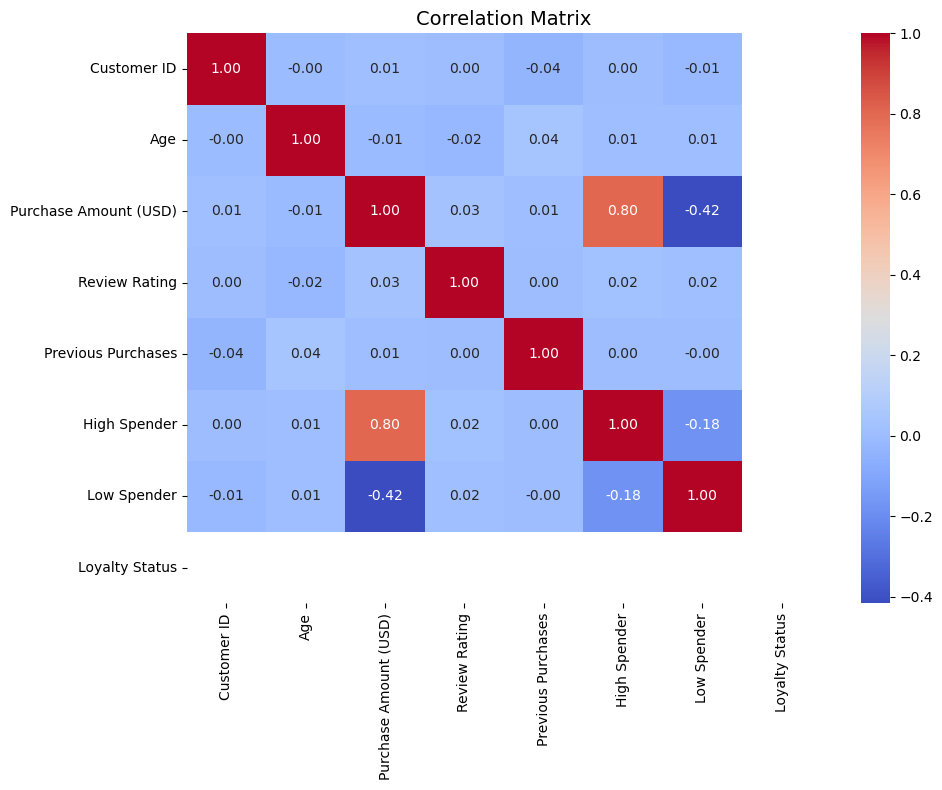

In [43]:
#correlation matrix
numircals = df.select_dtypes(include=['number'])
plt.figure(figsize=(10, 8))  # Adjust size
sns.heatmap(numircals.corr(), annot=True, cmap="coolwarm", fmt=".2f")
plt.title("Correlation Matrix", fontsize=14)
plt.xticks(rotation=90)  # Rotate labels for readability
plt.yticks(rotation=0)  # Keep y-axis readable
plt.tight_layout()  # Fix spacing
plt.show()

## Data Visualization

In [46]:
# Get the top 3 most used shipping types
top_shipping_types = df["Shipping Type"].value_counts().head(3).index

# Filter the dataset for only these top shipping types
top_shipping_data = df[df["Shipping Type"].isin(top_shipping_types)]

# Display average age for each shipping type
top_shipping_age = top_shipping_data.groupby("Shipping Type")["Age"].describe()
print(top_shipping_age)

               count       mean        std   min    25%   50%   75%   max
Shipping Type                                                            
Free Shipping  675.0  43.992593  15.057209  18.0  32.00  43.0  57.0  70.0
Standard       654.0  44.764526  15.387677  18.0  30.25  46.0  58.0  70.0
Store Pickup   650.0  43.392308  14.825797  18.0  30.00  43.0  55.0  70.0


C:\Users\mo\AppData\Local\Temp\ipykernel_18840\4126046227.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x="Shipping Type", y="Age", data=top_shipping_data, palette="Set2")


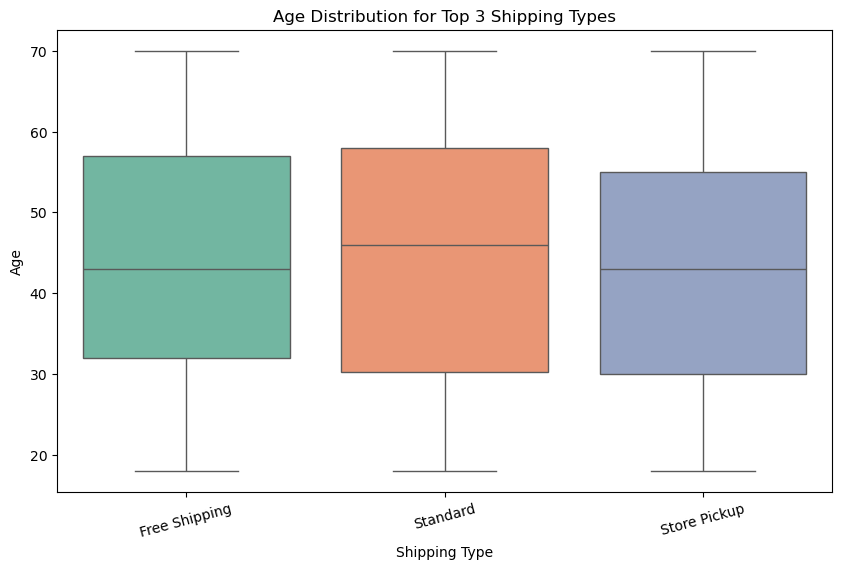

In [48]:
plt.figure(figsize=(10, 6))
sns.boxplot(x="Shipping Type", y="Age", data=top_shipping_data, palette="Set2")
plt.title("Age Distribution for Top 3 Shipping Types")
plt.xlabel("Shipping Type")
plt.ylabel("Age")
plt.xticks(rotation=15)
plt.show()

In [50]:
# Grouping by Size and checking average age
size_age_relation = df.groupby("Size")["Age"].describe()
print(size_age_relation)

       count       mean        std   min   25%   50%   75%   max
Size                                                            
L     1053.0  44.571700  15.099790  18.0  32.0  44.0  57.0  70.0
M     1755.0  44.025641  15.076087  18.0  31.0  44.0  57.0  70.0
S      663.0  43.865762  15.387495  18.0  31.0  44.0  57.0  70.0
XL     429.0  43.321678  15.731361  18.0  28.0  44.0  57.0  70.0


C:\Users\mo\AppData\Local\Temp\ipykernel_18840\2797858408.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x="Size", y="Age", data=df, palette="coolwarm")


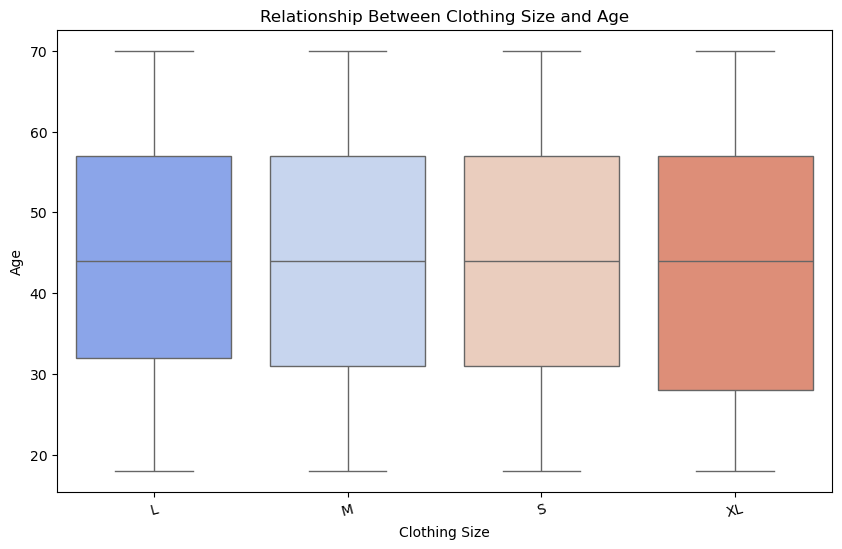

In [52]:
plt.figure(figsize=(10, 6))
sns.boxplot(x="Size", y="Age", data=df, palette="coolwarm")
plt.title("Relationship Between Clothing Size and Age")
plt.xlabel("Clothing Size")
plt.ylabel("Age")
plt.xticks(rotation=15)
plt.show()

Size      L     M    S   XL
Gender                     
Male    716  1165  476  295
Female  337   590  187  134


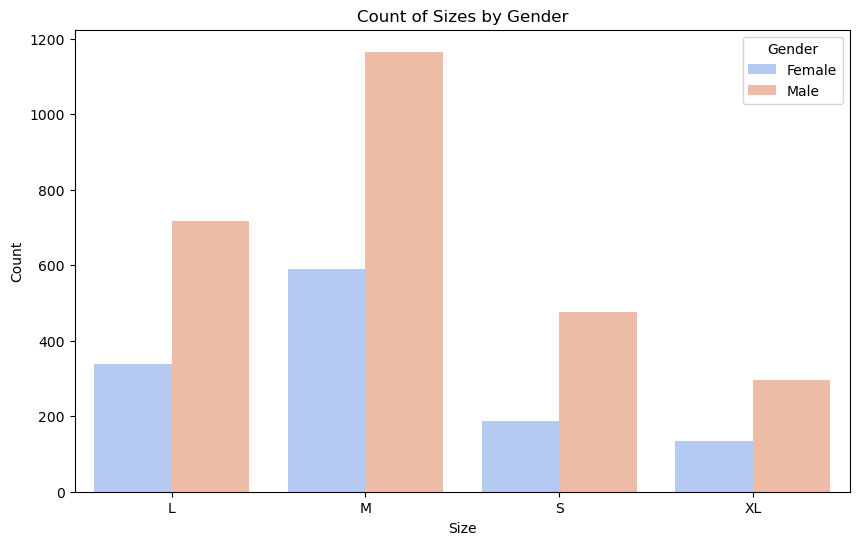

In [54]:
# Group by Gender and Size, then sort values
size_gender_counts = df.groupby(["Gender", "Size"]).size().unstack().fillna(0)

# Sort by total count per gender
size_gender_counts = size_gender_counts.loc[size_gender_counts.sum(axis=1).sort_values(ascending=False).index]

# Display the counts
print(size_gender_counts)

# Count plot for better visualization
plt.figure(figsize=(10, 6))
sns.countplot(data=df, x="Size", hue="Gender", order=sorted(df["Size"].unique()), palette="coolwarm")
plt.title("Count of Sizes by Gender")
plt.xlabel("Size")
plt.ylabel("Count")
plt.legend(title="Gender")
plt.show()

In [56]:
# Aggregate total sales by season
season_sales = df.groupby("Season")["Purchase Amount (USD)"].sum().sort_values(ascending=False)

# Aggregate total sales by age
age_sales = df.groupby("Age")["Purchase Amount (USD)"].sum()

In [58]:
season_sales

Season
Fall      60018
Spring    58679
Winter    58607
Summer    55777
Name: Purchase Amount (USD), dtype: int64

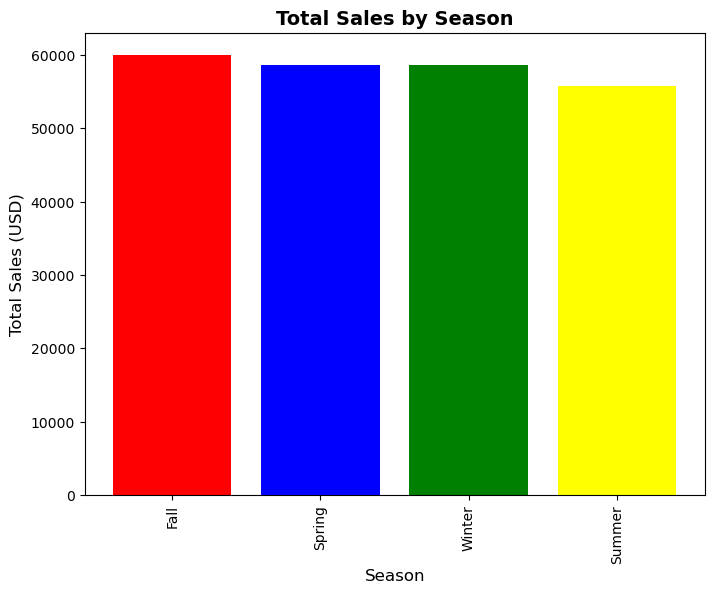

In [60]:
# Plot total sales by season using a bar chart
plt.figure(figsize=(8, 6))  # Increased figure width for better readability
plt.bar(season_sales.index, season_sales.values, color=["red", "blue", "green", "yellow"])  # Custom colors

# Add labels and title
plt.xlabel("Season", fontsize=12)
plt.ylabel("Total Sales (USD)", fontsize=12)
plt.title("Total Sales by Season", fontsize=14, fontweight="bold")

# Rotate x-axis labels for better visibility if needed
plt.xticks(rotation=90)

# Show the plot
plt.show()

C:\Users\mo\AppData\Local\Temp\ipykernel_18840\1079315603.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=season_sales.index, y=season_sales.values, palette="coolwarm")


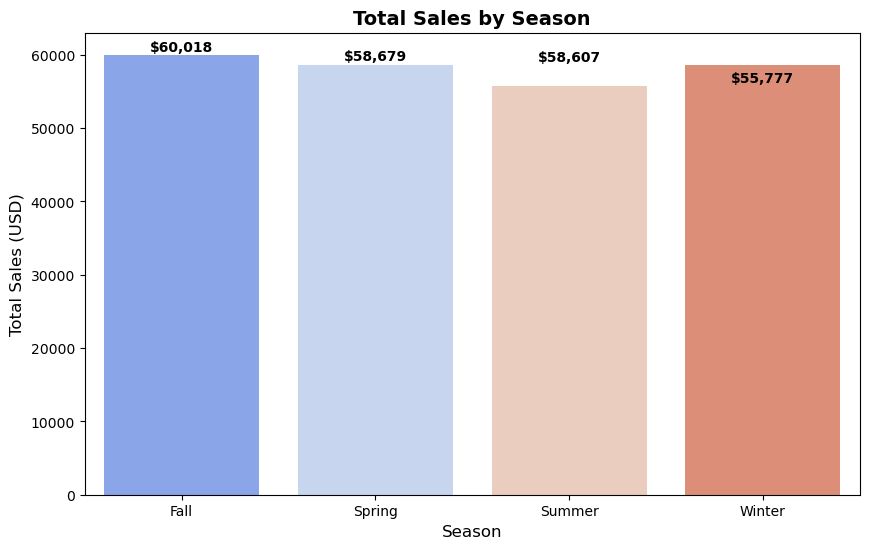

In [62]:
# Plot total sales by season
plt.figure(figsize=(10, 6))
sns.barplot(x=season_sales.index, y=season_sales.values, palette="coolwarm")

# Add labels and title
plt.xlabel("Season", fontsize=12)
plt.ylabel("Total Sales (USD)", fontsize=12)
plt.title("Total Sales by Season", fontsize=14, fontweight="bold")

# Show values on bars
for index, value in enumerate(season_sales.values):
    plt.text(index, value + 500, f"${value:,}", ha="center", fontsize=10, fontweight="bold")

# Show the plot
plt.show()

In [64]:
age_sales

Age
18    4139
19    4941
20    3424
21    4423
22    4011
23    4029
24    4291
25    5372
26    4212
27    4460
28    5104
29    4499
30    4374
31    4864
32    4796
33    3960
34    3759
35    4314
36    4511
37    4737
38    4169
39    4057
40    4026
41    5282
42    4357
43    4698
44    3312
45    4085
46    4318
47    4019
48    3576
49    5552
50    4930
51    4601
52    4255
53    4752
54    5282
55    4334
56    4293
57    5200
58    4521
59    4348
60    3730
61    4172
62    4809
63    4519
64    4170
65    4590
66    4065
67    3258
68    4287
69    5484
70    3810
Name: Purchase Amount (USD), dtype: int64

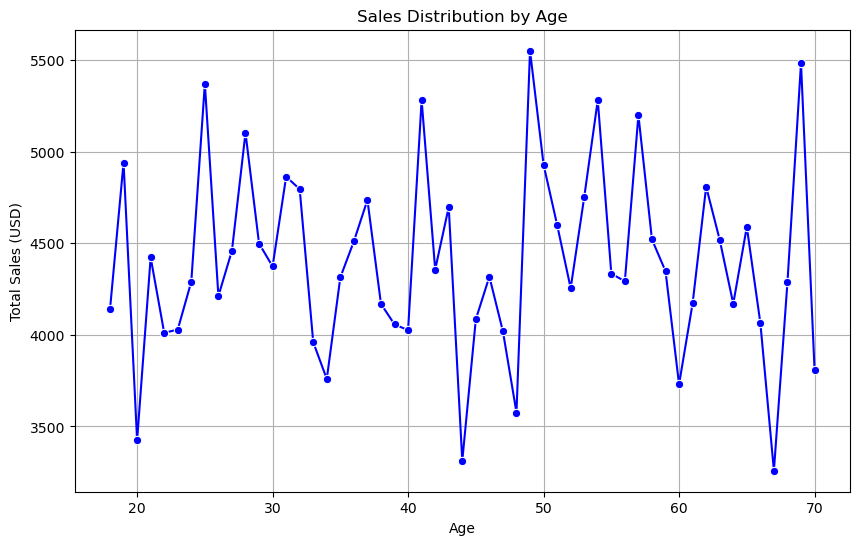

In [66]:
# Plot sales distribution by age
plt.figure(figsize=(10, 6))
sns.lineplot(x=age_sales.index, y=age_sales.values, marker="o", color="b")
plt.xlabel("Age")
plt.ylabel("Total Sales (USD)")
plt.title("Sales Distribution by Age")
plt.grid(True)
plt.show()

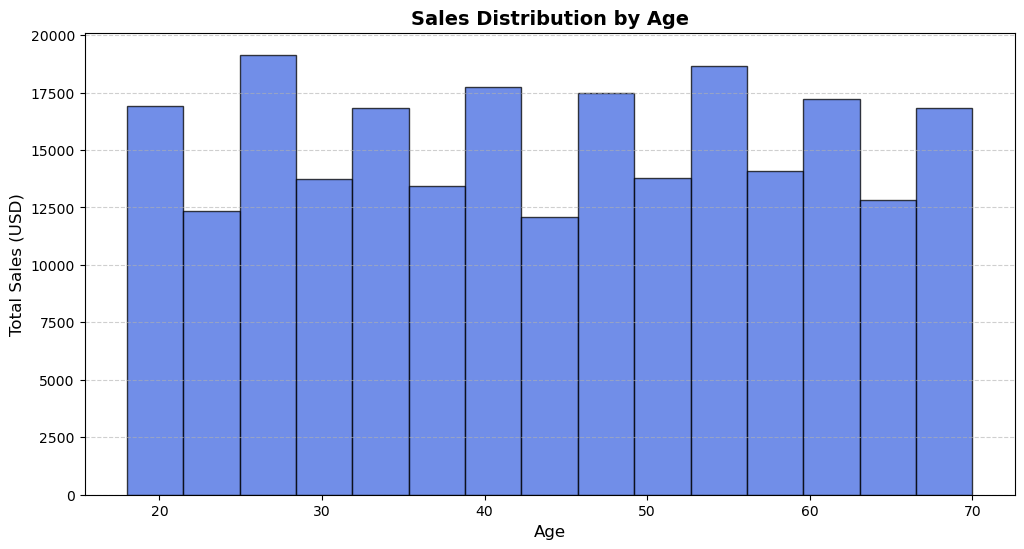

In [68]:
# Plot sales distribution by age using a histogram with enhancements
plt.figure(figsize=(12, 6))
plt.hist(df["Age"], weights=df["Purchase Amount (USD)"], bins=15, color="royalblue", edgecolor="black", alpha=0.75)

# Add labels and title
plt.xlabel("Age", fontsize=12)
plt.ylabel("Total Sales (USD)", fontsize=12)
plt.title("Sales Distribution by Age", fontsize=14, fontweight="bold")

# Improve readability
plt.xticks(fontsize=10)
plt.yticks(fontsize=10)
plt.grid(axis="y", linestyle="--", alpha=0.6)

# Show the plot
plt.show()



C:\Users\mo\AppData\Local\Temp\ipykernel_18840\4236001337.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=age_sales.index, y=age_sales.values, palette="coolwarm")


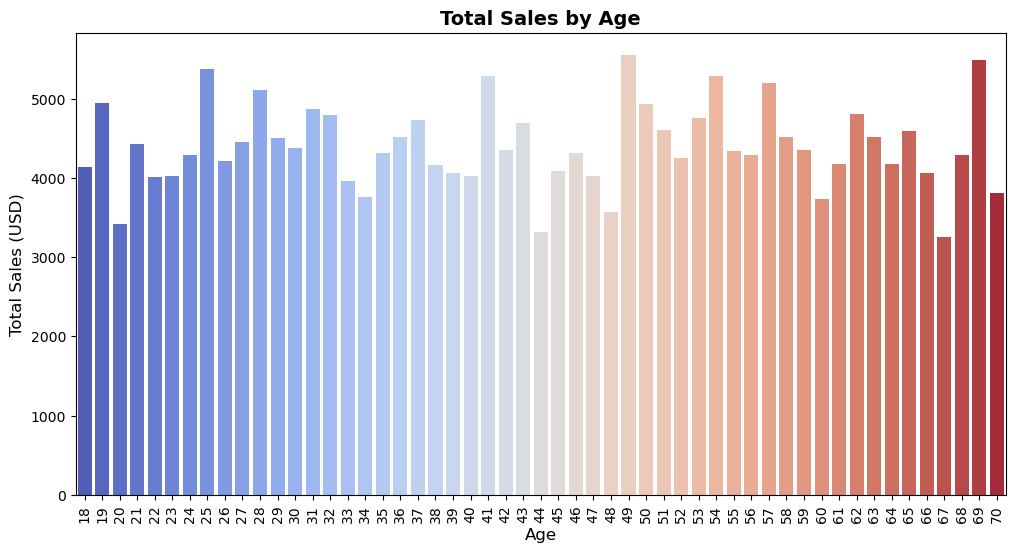

In [70]:
# Plot total sales by age with better visualization
plt.figure(figsize=(12, 6))
sns.barplot(x=age_sales.index, y=age_sales.values, palette="coolwarm")

# Rotate x-axis labels for better readability
plt.xticks(rotation=90)  # Adjust rotation as needed

# Add labels and title
plt.xlabel("Age", fontsize=12)
plt.ylabel("Total Sales (USD)", fontsize=12)
plt.title("Total Sales by Age", fontsize=14, fontweight="bold")

# Show the plot
plt.show()


In [71]:
df.head()

,Customer ID,Age,Gender,Item Purchased,Category,Purchase Amount (USD),Location,Size,Color,Season,...,Preferred Payment Method,Frequency of Purchases,Promo_Code_Used,Discount_Applied,Subscription_Status,kinds_shopping,Kind_age,High Spender,Low Spender,Loyalty Status
0,1,55,Male,Blouse,Clothing,53,Kentucky,L,Gray,Winter,...,Venmo,Fortnightly,True,True,True,Apparel,older,0,0,0
1,2,19,Male,Sweater,Clothing,64,Maine,L,Maroon,Winter,...,Cash,Fortnightly,True,True,True,Apparel,Young,0,0,0
2,3,50,Male,Jeans,Clothing,73,Massachusetts,S,Maroon,Spring,...,Credit Card,Weekly,True,True,True,Apparel,Middle-aged,0,0,0
3,4,21,Male,Sandals,Footwear,90,Rhode Island,M,Maroon,Spring,...,PayPal,Weekly,True,True,True,Apparel,Young,1,0,0
4,5,45,Male,Blouse,Clothing,49,Oregon,M,Turquoise,Spring,...,PayPal,Annually,True,True,True,Apparel,Middle-aged,0,0,0


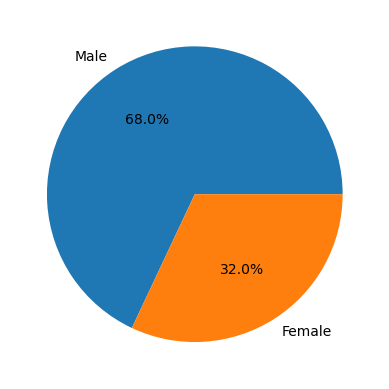

In [74]:
plt.pie(df['Gender'].value_counts(), labels = df['Gender'].value_counts().index, autopct='%1.1f%%')
plt.show()

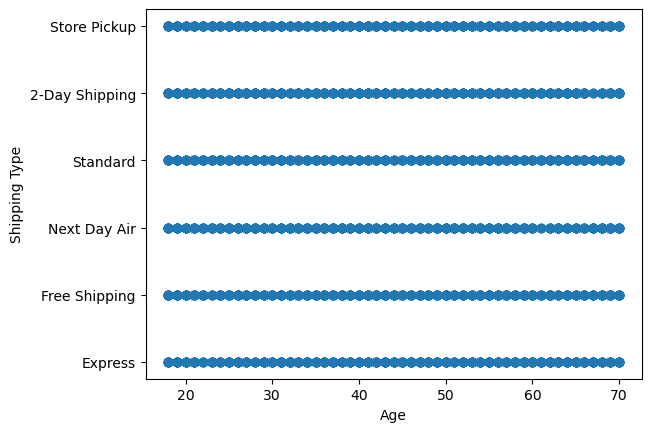

In [76]:
plt.scatter(df['Age'], df['Shipping Type'])
plt.xlabel('Age')
plt.ylabel('Shipping Type')
plt.show()


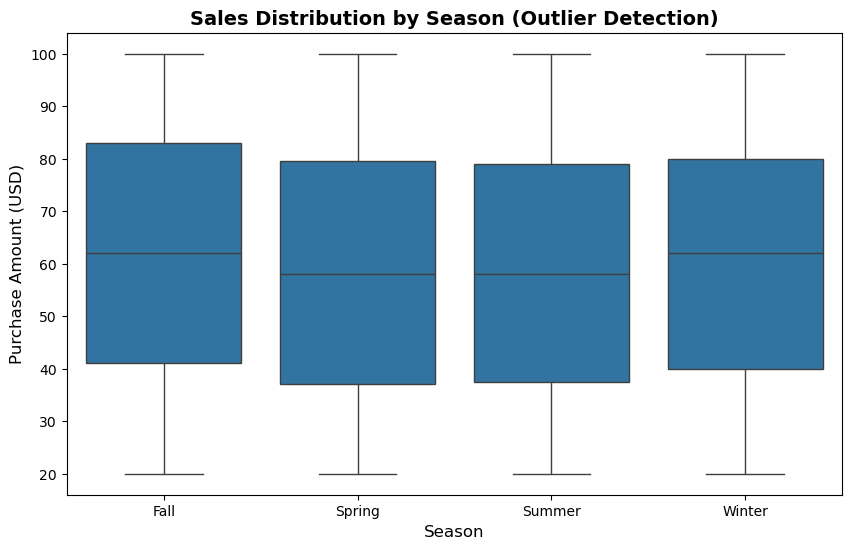

In [78]:
# Boxplot for sales distribution by season (detecting outliers)
plt.figure(figsize=(10, 6))
sns.boxplot(x=df["Season"], y=df["Purchase Amount (USD)"])

# Add labels and title
plt.xlabel("Season", fontsize=12)
plt.ylabel("Purchase Amount (USD)", fontsize=12)
plt.title("Sales Distribution by Season (Outlier Detection)", fontsize=14, fontweight="bold")

# Show the plot
plt.show()

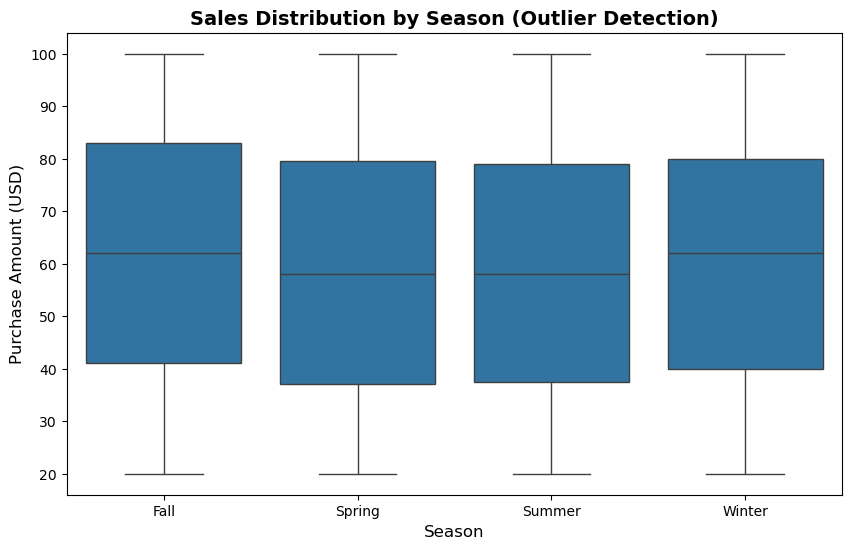

Number of Outliers: 0


,Customer ID,Age,Gender,Item Purchased,Category,Purchase Amount (USD),Location,Size,Color,Season,...,Preferred Payment Method,Frequency of Purchases,Promo_Code_Used,Discount_Applied,Subscription_Status,kinds_shopping,Kind_age,High Spender,Low Spender,Loyalty Status


In [80]:
# Boxplot for sales distribution by season (detecting outliers)
plt.figure(figsize=(10, 6))
sns.boxplot(x=df["Season"], y=df["Purchase Amount (USD)"])

# Add labels and title
plt.xlabel("Season", fontsize=12)
plt.ylabel("Purchase Amount (USD)", fontsize=12)
plt.title("Sales Distribution by Season (Outlier Detection)", fontsize=14, fontweight="bold")

# Show the plot
plt.show()

# Detecting Outliers Using IQR
Q1 = df["Purchase Amount (USD)"].quantile(0.25)
Q3 = df["Purchase Amount (USD)"].quantile(0.75)
IQR = Q3 - Q1

# Define lower and upper bounds
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# Find outliers
outliers = df[(df["Purchase Amount (USD)"] < lower_bound) | (df["Purchase Amount (USD)"] > upper_bound)]

# Display outliers
print(f"Number of Outliers: {outliers.shape[0]}")
outliers.head()

In [82]:
outliers = df[(df["Purchase Amount (USD)"] >= lower_bound) & (df["Purchase Amount (USD)"] <= upper_bound)]
outliers.head()

,Customer ID,Age,Gender,Item Purchased,Category,Purchase Amount (USD),Location,Size,Color,Season,...,Preferred Payment Method,Frequency of Purchases,Promo_Code_Used,Discount_Applied,Subscription_Status,kinds_shopping,Kind_age,High Spender,Low Spender,Loyalty Status
0,1,55,Male,Blouse,Clothing,53,Kentucky,L,Gray,Winter,...,Venmo,Fortnightly,True,True,True,Apparel,older,0,0,0
1,2,19,Male,Sweater,Clothing,64,Maine,L,Maroon,Winter,...,Cash,Fortnightly,True,True,True,Apparel,Young,0,0,0
2,3,50,Male,Jeans,Clothing,73,Massachusetts,S,Maroon,Spring,...,Credit Card,Weekly,True,True,True,Apparel,Middle-aged,0,0,0
3,4,21,Male,Sandals,Footwear,90,Rhode Island,M,Maroon,Spring,...,PayPal,Weekly,True,True,True,Apparel,Young,1,0,0
4,5,45,Male,Blouse,Clothing,49,Oregon,M,Turquoise,Spring,...,PayPal,Annually,True,True,True,Apparel,Middle-aged,0,0,0


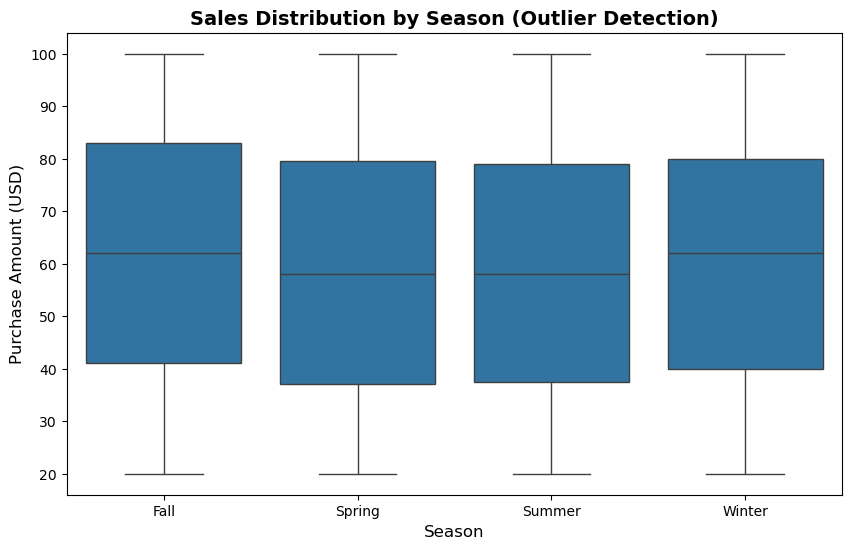

Number of Outliers: 3900


,Customer ID,Age,Gender,Item Purchased,Category,Purchase Amount (USD),Location,Size,Color,Season,...,Preferred Payment Method,Frequency of Purchases,Promo_Code_Used,Discount_Applied,Subscription_Status,kinds_shopping,Kind_age,High Spender,Low Spender,Loyalty Status
0,1,55,Male,Blouse,Clothing,53,Kentucky,L,Gray,Winter,...,Venmo,Fortnightly,True,True,True,Apparel,older,0,0,0
1,2,19,Male,Sweater,Clothing,64,Maine,L,Maroon,Winter,...,Cash,Fortnightly,True,True,True,Apparel,Young,0,0,0
2,3,50,Male,Jeans,Clothing,73,Massachusetts,S,Maroon,Spring,...,Credit Card,Weekly,True,True,True,Apparel,Middle-aged,0,0,0
3,4,21,Male,Sandals,Footwear,90,Rhode Island,M,Maroon,Spring,...,PayPal,Weekly,True,True,True,Apparel,Young,1,0,0
4,5,45,Male,Blouse,Clothing,49,Oregon,M,Turquoise,Spring,...,PayPal,Annually,True,True,True,Apparel,Middle-aged,0,0,0


In [88]:
# Boxplot for sales distribution by season (detecting outliers)
plt.figure(figsize=(10, 6))
sns.boxplot(x=df["Season"], y=df["Purchase Amount (USD)"])

# Add labels and title
plt.xlabel("Season", fontsize=12)
plt.ylabel("Purchase Amount (USD)", fontsize=12)
plt.title("Sales Distribution by Season (Outlier Detection)", fontsize=14, fontweight="bold")

# Show the plot
plt.show()

# Detecting Outliers Using IQR
Q1 = df["Purchase Amount (USD)"].quantile(0.25)
Q3 = df["Purchase Amount (USD)"].quantile(0.75)
IQR = Q3 - Q1

# Define lower and upper bounds
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# Find outliers
outliers = df[(df["Purchase Amount (USD)"] >= lower_bound) & (df["Purchase Amount (USD)"] <= upper_bound)]

# Display outliers
print(f"Number of Outliers: {outliers.shape[0]}")
outliers.head()

In [92]:
season_counts = df['Season'].value_counts()
avg_purchase_season = df.groupby('Season')['Purchase Amount (USD)'].mean()
high_spenders_season = df.groupby('Season')['High Spender'].sum()

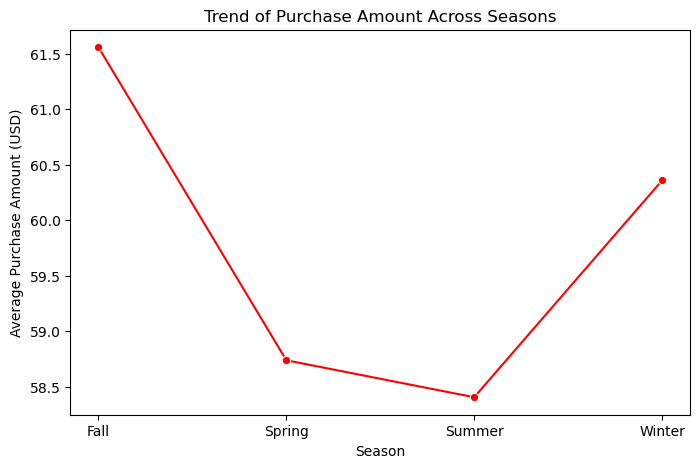

In [94]:
plt.figure(figsize=(8,5))
sns.lineplot(data=avg_purchase_season, marker="o", color="red")
plt.xlabel("Season")
plt.ylabel("Average Purchase Amount (USD)")
plt.title("Trend of Purchase Amount Across Seasons")
plt.show()